In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


## Define functions

In [3]:
# Plot for Altitude over Time, colored by 'on_lift' status
def plot_prediction(data_frame: pd.DataFrame, pred_column: str):
  plt.figure(figsize=(14, 7))
  # Plot points where 'on_lift' is 1 with one color
  plt.scatter(data_frame.loc[data_frame[pred_column] == 1, 'Timestamp'],
              data_frame.loc[data_frame[pred_column] == 1, 'Alt(m)'],
              c='red',
              label='On the lift',
              marker='o')

  # Plot points where 'on_lift' is 0 with another color
  plt.scatter(data_frame.loc[data_frame[pred_column] == 0, 'Timestamp'],
              data_frame.loc[data_frame[pred_column] == 0, 'Alt(m)'],
              c='blue',
              label='Not on the lift',
              marker='o')

  plt.title('Altitude over Time by on_lift')
  plt.xlabel('Timestamp')
  plt.ylabel('Altitude (m)')
  plt.legend()
  plt.show()
  print(data_frame.columns)

In [4]:
def add_features(data_frame):
  # Calculate change in speed
  data_frame['Speed_change'] = data_frame['Speed(m/s)'].diff().fillna(0)

  # Calculate the altitude difference between consecutive points
  data_frame['Altitude_change'] = data_frame['Alt(m)'].diff().fillna(0)

  # Calculate the Course
  data_frame['Course_change'] = data_frame['Course'].diff().fillna(0)

  #print(data_frame[['Timestamp',
  #         'Alt(m)',
  #          'Altitude_change',
  #          'Speed(m/s)',
  #          'Speed_change',
  #          'Course',
  #          'Course_change'
  #          ]].head())

## Load Data

In [638]:
data = {'95m': 'https://drive.google.com/file/d/1dp36BujminFOR0cjdTn3nIFY3RLmnqSI/view?usp=drive_link',
        '206m': 'https://drive.google.com/file/d/1ylBDR2pEpMELt_WU9XrQdP6ove-xg1Yx/view?usp=drive_link',
        '310m': 'https://drive.google.com/file/d/17I2jjhrJJTqinAupMRksuq-xiF9SfOd4/view?usp=drive_link'
        }

In [7]:
df_95 = pd.read_csv()

In [8]:
# please use you local csv !!!
df_95 = pd.read_csv('https://drive.google.com/uc?id=' + data['95m'].split('/')[-2])
# Convert 'Timestamp' column to datetime
df_95['Timestamp'] = pd.to_datetime(df_95['Timestamp'])

df_206=pd.read_csv('https://drive.google.com/uc?id=' + data['206m'].split('/')[-2])
# Convert 'Timestamp' column to datetime
df_206['Timestamp'] = pd.to_datetime(df_206['Timestamp'])

df_310=pd.read_csv('https://drive.google.com/uc?id=' + data['310m'].split('/')[-2])
# Convert 'Timestamp' column to datetime
df_310['Timestamp'] = pd.to_datetime(df_310['Timestamp'])

df_95.shape, df_310.shape, df_206.shape

((5717, 46), (18577, 46), (12373, 45))

###Feature Engineering

In [9]:
add_features(df_95)
add_features(df_310)
add_features(df_206)

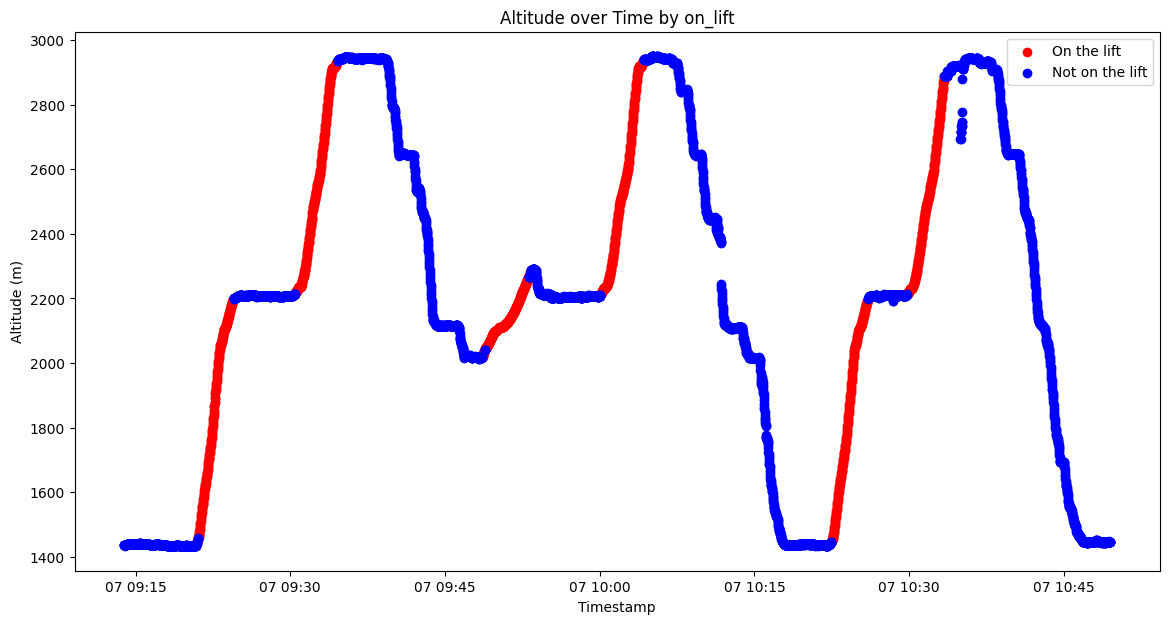

Index(['Timestamp', 'accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)',
       'accelUserY(g)', 'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)',
       'gyroZ(rad/s)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12',
       'm13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW',
       'Lat', 'Long', 'Speed(m/s)', 'TrueHeading', 'Alt(m)',
       'HorizontalAccuracy(m)', 'VerticalAccuracy(m)', 'Course',
       'ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)',
       'RelativeAltitude(meters)', 'magX(µT)', 'magY(µT)', 'magZ(µT)',
       'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)', 'Cluster_1', 'on_lift',
       'Speed_change', 'Altitude_change', 'Course_change'],
      dtype='object')


In [208]:
plot_prediction(df_95, 'on_lift')

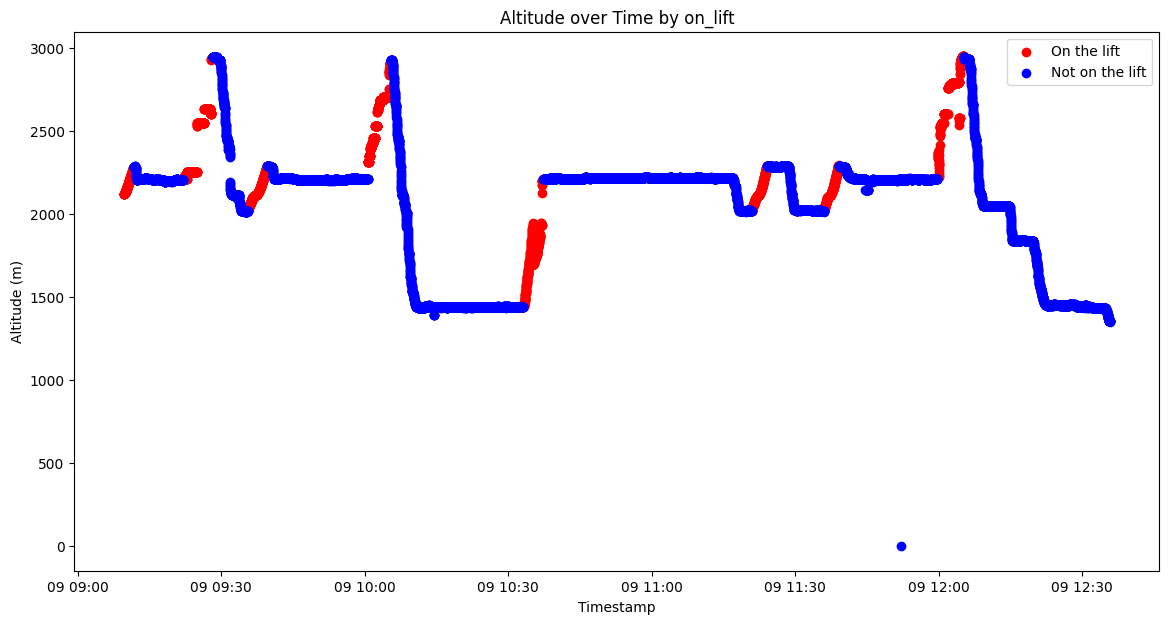

Index(['Timestamp', 'accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)',
       'accelUserY(g)', 'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)',
       'gyroZ(rad/s)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12',
       'm13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW',
       'Lat', 'Long', 'Speed(m/s)', 'TrueHeading', 'Alt(m)',
       'HorizontalAccuracy(m)', 'VerticalAccuracy(m)', 'Course',
       'ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)',
       'RelativeAltitude(meters)', 'magX(µT)', 'magY(µT)', 'magZ(µT)',
       'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)', 'on_lift', 'Speed_change',
       'Altitude_change', 'Course_change'],
      dtype='object')


In [209]:
plot_prediction(df_206, 'on_lift')

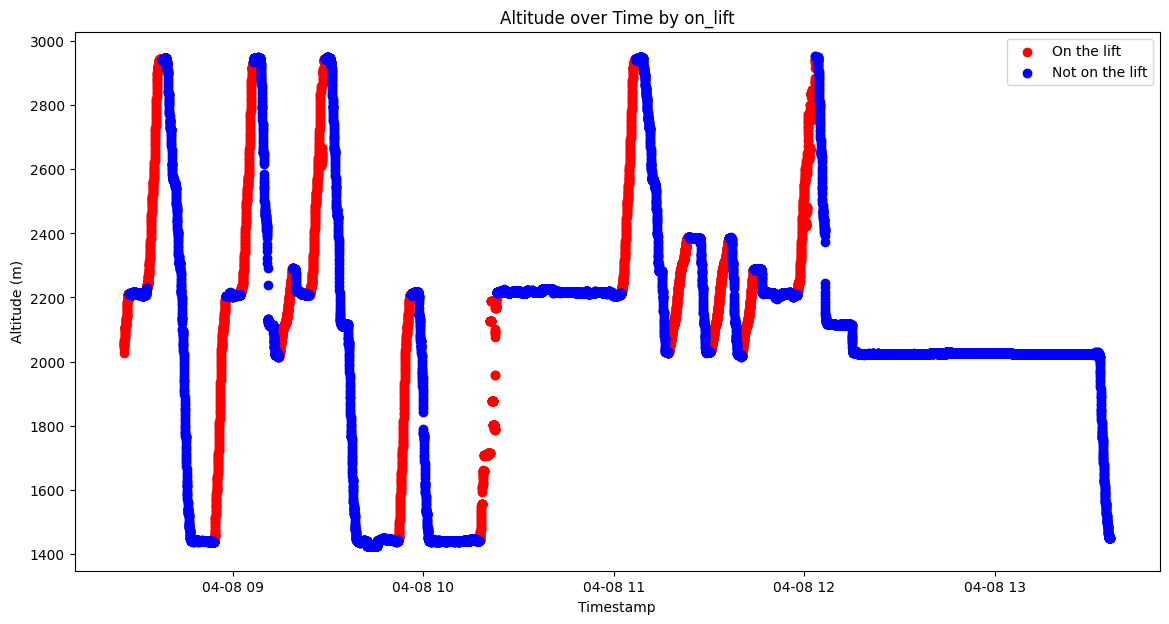

Index(['Timestamp', 'accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)',
       'accelUserY(g)', 'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)',
       'gyroZ(rad/s)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12',
       'm13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW',
       'Lat', 'Long', 'Speed(m/s)', 'TrueHeading', 'Alt(m)',
       'HorizontalAccuracy(m)', 'VerticalAccuracy(m)', 'Course',
       'ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)',
       'RelativeAltitude(meters)', 'magX(µT)', 'magY(µT)', 'magZ(µT)',
       'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)', 'Cluster_1', 'on_lift',
       'Speed_change', 'Altitude_change', 'Course_change'],
      dtype='object')


In [210]:
plot_prediction(df_310, 'on_lift')

## Testing RNN construction


In [449]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from math import floor

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model

### Feature Selection

In [140]:
# Define sequence length and other parameters
sequence_length = 60 # 1 min
num_classes = 1 # binary classification

# Prepare your data
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data.iloc[i:i+sequence_length]
        sequences.append(sequence.values)
    return np.array(sequences)


In [314]:
def sequence_averaging(input_seq):
  new_sequence = []
  for sequence in input_seq:
    sum = 0
    for array in sequence:
      sum = sum+array[0]
    new_sequence.append(
        int(round(sum/float(sequence_length), 0)))
  return np.array(new_sequence)


In [ ]:
# made difference sequence function for one every second

# Define sequence length and other parameters
sequence_length = 60 # 1 min
num_classes = 1 # binary classification

# Prepare your data
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(floor(len(data)/sequence_length)):
        start = i*sequence_length
        end = (i+1)*sequence_length
        sequence = data.iloc[start:end]
        sequences.append(sequence.values)
    return np.array(sequences)

In [420]:
features=[
             #'Timestamp',
             'accelX(g)', 'accelY(g)', 'accelZ(g)',
             'accelUserX(g)','accelUserY(g)', 'accelUserZ(g)',
             'gyroX(rad/s)', 'gyroY(rad/s)','gyroZ(rad/s)',
             #'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)',
             #'m11', 'm12','m13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33',
             #'qX', 'qY', 'qZ', 'qW',
             'Lat', 'Long',
             'Speed(m/s)',
             #'TrueHeading',
             'Alt(m)',
             #'HorizontalAccuracy(m)', 'VerticalAccuracy(m)',
             'Course',
             #'ActivityType', 'ActivityConfidence',
             #'Pressure(kilopascals)',
             #'RelativeAltitude(meters)',
             'magX(µT)', 'magY(µT)', 'magZ(µT)',
             'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)',
             #'Cluster_1',
             #'on_lift',
             'Speed_change',
             'Altitude_change',
             'Course_change'
             ]
len(features)

23

In [421]:
# Data pre Processing
# Load X and Y from desired file
X = df_95[features]
Y = df_95['on_lift']

# Define preprocessing steps
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

# Impute missing values
X_imputed = imputer.fit_transform(X)

# Scale features
X_scaled = scaler.fit_transform(X_imputed)

########## Scaling different features requires some thought. EG Lat, long vs alt #############

In [422]:
# generate train/Test split

n = len(X_scaled)
ratio = 0.7

train_df = pd.DataFrame(data=X_scaled[0:int(n*ratio)], columns= features)
test_df = pd.DataFrame(data=X_scaled[int(n*ratio):], columns= features)

y_train = pd.DataFrame(data=Y[0:int(n*ratio)])
y_test = pd.DataFrame(data=Y[int(n*ratio):])

num_features = X_scaled.shape[1]

In [423]:
# DataFrame shape (num_samples, num_features)
X_train_sequences = create_sequences(train_df, sequence_length)

In [424]:
train_df.shape, X_train_sequences.shape

((4001, 23), (3942, 60, 23))

In [425]:
# DataFrame shape (num_samples, num_features)
X_train_sequences = create_sequences(train_df, sequence_length)
X_test_sequences = create_sequences(test_df, sequence_length)

y_train_sequences = create_sequences(y_train, sequence_length)
y_test_sequences = create_sequences(y_test, sequence_length)

# Print shape to verify
print("Shape of X_train_sequences:", X_train_sequences.shape)
print("Shape of X_test_sequences:", X_test_sequences.shape)
print("Shape of y_train_sequences:", y_train_sequences.shape)
print("Shape of y_test_sequences:", y_test_sequences.shape)


Shape of X_train_sequences: (3942, 60, 23)
Shape of X_test_sequences: (1657, 60, 23)
Shape of y_train_sequences: (3942, 60, 1)
Shape of y_test_sequences: (1657, 60, 1)


In [426]:
y_train_avg_sequences = sequence_averaging(y_train_sequences)
y_test_avg_sequences = sequence_averaging(y_test_sequences)

In [427]:
print("Shape of y_train_avg_sequences:", y_train_avg_sequences.shape)
print("Shape of y_test_avg_sequences:", y_test_avg_sequences.shape)

Shape of y_train_avg_sequences: (3942,)
Shape of y_test_avg_sequences: (1657,)


In [428]:
num_classes = 1
num_features = len(features)

# Define your model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, num_features)),
    Dense(num_classes, activation='sigmoid')
                  ])

In [429]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001,  # Set the learning rate
)

In [430]:
model.reset_states()
model.reset_metrics()

In [431]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [432]:
# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10,
                                        restore_best_weights=True,
                                        verbose=1
                                        )

reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.5,
                                       patience=4,
                                       verbose=1,
                                       mode='auto',
                                       min_delta=0.0001,
                                       cooldown=0,
                                       min_lr=0)

checkpoint_callback = ModelCheckpoint(filepath='best_model_weights.h5',
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

In [433]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history returned by model.fit()
history = model.fit(X_train_sequences, y_train_avg_sequences,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]
                    )

Epoch 1/100
98/99 [============================>.] - ETA: 0s - loss: 0.6310 - accuracy: 0.6846
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model_weights.h5
99/99 [==============================] - 5s 33ms/step - loss: 0.6304 - accuracy: 0.6854 - val_loss: 0.4063 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/100
99/99 [==============================] - ETA: 0s - loss: 0.5881 - accuracy: 0.6876
Epoch 2: val_accuracy did not improve from 1.00000
99/99 [==============================] - 3s 27ms/step - loss: 0.5881 - accuracy: 0.6876 - val_loss: 0.2372 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/100
99/99 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.8589
Epoch 3: val_accuracy did not improve from 1.00000
99/99 [==============================] - 3s 32ms/step - loss: 0.3478 - accuracy: 0.8589 - val_loss: 0.1244 - val_accuracy: 0.9442 - lr: 1.0000e-04
Epoch 4/100
97/99 [============================>.] - ETA: 0s - loss: 0.2340 - acc

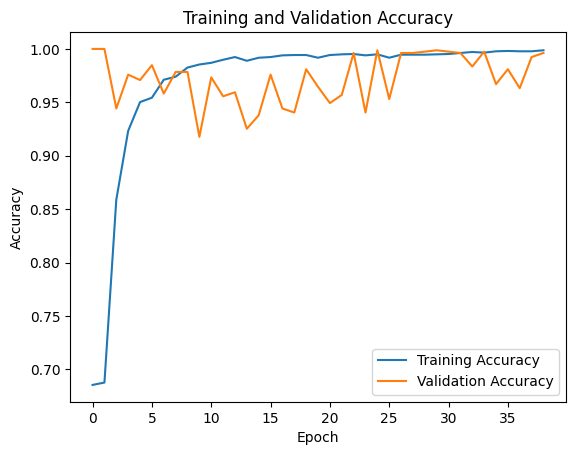

In [434]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [435]:
# Evaluate your model
loss, accuracy = model.evaluate(X_test_sequences, y_test_avg_sequences)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

52/52 [==============================] - 1s 9ms/step - loss: 0.8791 - accuracy: 0.8467
Test Loss: 0.879106879234314, Test Accuracy: 0.8467109203338623


### Evaluation

## 95 data

In [436]:
# Data pre Processing
# Load X and Y from desired file
X_95 = df_95[features]
y_95 = df_95['on_lift']

# Impute missing values
X_95_imputed = imputer.fit_transform(X_95)

# Scale features
X_95_scaled = scaler.fit_transform(X_95_imputed)

num_95_features = X_95_scaled.shape[1]
########## Scaling different features requires some thought. EG Lat, long vs alt #############

In [437]:
# DataFrame shape (num_samples, num_features)
X_95_sequences = create_sequences(pd.DataFrame(X_95_scaled), sequence_length)
y_95_sequences = create_sequences(pd.DataFrame(y_95), sequence_length)

# Print shape to verify
print("Shape of X_95_sequences:", X_95_sequences.shape)
print("Shape of y_95_sequences:", y_95_sequences.shape)

Shape of X_95_sequences: (5658, 60, 23)
Shape of y_95_sequences: (5658, 60, 1)


In [438]:
# Evaluate your model
loss_95, accuracy_95 = model.evaluate(X_95_sequences, y_95_sequences)
print(f'Test Loss_95: {loss_95}, Test Accuracy_95: {accuracy_95}')

177/177 [==============================] - 2s 9ms/step - loss: 0.3684 - accuracy: 0.9279
Test Loss_95: 0.3684363067150116, Test Accuracy_95: 0.9278631210327148


## 206 data

In [439]:
# Data pre Processing
# Load X and Y from desired file
X_206 = df_206[features]
y_206 = df_206['on_lift']

# Impute missing values
X_206_imputed = imputer.fit_transform(X_206)

# Scale features
X_206_scaled = scaler.fit_transform(X_206_imputed)

num_206_features = X_206_scaled.shape[1]
########## Scaling different features requires some thought. EG Lat, long vs alt #############

In [440]:
# DataFrame shape (num_samples, num_features)
X_206_sequences = create_sequences(pd.DataFrame(X_206_scaled), sequence_length)
y_206_sequences = create_sequences(pd.DataFrame(y_206), sequence_length)

# Print shape to verify
print("Shape of X_206_sequences:", X_206_sequences.shape)
print("Shape of y_206_sequences:", y_206_sequences.shape)

Shape of X_206_sequences: (12314, 60, 23)
Shape of y_206_sequences: (12314, 60, 1)


In [441]:
# Evaluate your model
loss_206, accuracy_206 = model.evaluate(X_206_sequences, y_206_sequences)
print(f'Test Loss_206: {loss_206}, Test Accuracy_206: {accuracy_206}')

385/385 [==============================] - 4s 10ms/step - loss: 1.0330 - accuracy: 0.8359
Test Loss_206: 1.0330026149749756, Test Accuracy_206: 0.8359184861183167


## 310 data

In [442]:
# Data pre Processing
# Load X and Y from desired file
X_310 = df_310[features]
y_310 = df_310['on_lift']

# Impute missing values
X_310_imputed = imputer.fit_transform(X_310)

# Scale features
X_310_scaled = scaler.fit_transform(X_310_imputed)

num_310_features = X_310_scaled.shape[1]
########## Scaling different features requires some thought. EG Lat, long vs alt #############


In [443]:
# DataFrame shape (num_samples, num_features)
X_310_train_sequences = create_sequences(pd.DataFrame(X_310_scaled), sequence_length)

y_310_train_sequences = create_sequences(pd.DataFrame(y_310), sequence_length)

# Print shape to verify
print("Shape of X_310_train_sequences:", X_310_train_sequences.shape)

print("Shape of y_310_train_sequences:", y_310_train_sequences.shape)



Shape of X_310_train_sequences: (18518, 60, 23)
Shape of y_310_train_sequences: (18518, 60, 1)


In [444]:
y_310_train_sequences = sequence_averaging(y_310_train_sequences)

In [445]:
# Evaluate your model
loss_310, accuracy_310 = model.evaluate(X_310_train_sequences, y_310_train_sequences)
print(f'Test Loss_310: {loss_310}, Test Accuracy_310: {accuracy_310}')

579/579 [==============================] - 5s 9ms/step - loss: 1.1968 - accuracy: 0.8101
Test Loss_310: 1.1967763900756836, Test Accuracy_310: 0.8101306557655334


In [446]:
model.save("best_model_23_params.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [450]:
best_model = load_model("best_model_23_params.h5")

# Second Model

In [688]:
# Concatenate the DataFrames along the index axis
df_total = pd.concat([df_95, df_206])

In [611]:
features=[
             #'Timestamp',
             'accelX(g)', 'accelY(g)', 'accelZ(g)',
             'accelUserX(g)','accelUserY(g)', 'accelUserZ(g)',
             'gyroX(rad/s)', 'gyroY(rad/s)','gyroZ(rad/s)',
             #'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)',
             #'m11', 'm12','m13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33',
             #'qX', 'qY', 'qZ', 'qW',
             'Lat', 'Long',
             'Speed(m/s)',
             #'TrueHeading',
             'Alt(m)',
             #'HorizontalAccuracy(m)', 'VerticalAccuracy(m)',
             'Course',
             #'ActivityType', 'ActivityConfidence',
             #'Pressure(kilopascals)',
             #'RelativeAltitude(meters)',
             'magX(µT)', 'magY(µT)', 'magZ(µT)',
             'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)',
             #'Cluster_1',
             #'on_lift',
             'Speed_change',
             'Altitude_change',
             'Course_change'
             ]
len(features)

23

In [672]:
# Data pre Processing
# Load X and Y from desired file
X = df_95[features]
Y = df_95['on_lift']

# Define preprocessing steps
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

# Impute missing values
X_imputed = imputer.fit_transform(X)

# Scale features
X_scaled = scaler.fit_transform(X_imputed)

########## Scaling different features requires some thought. EG Lat, long vs alt #############

In [675]:
# generate train/Test split

n = len(X_scaled)
ratio = 0.8

train_df = pd.DataFrame(data=X_scaled[0:int(n*ratio)], columns= features)
test_df = pd.DataFrame(data=X_scaled[int(n*ratio):], columns= features)

y_train = pd.DataFrame(data=Y[0:int(n*ratio)])
y_test = pd.DataFrame(data=Y[int(n*ratio):])

num_features = X_scaled.shape[1]

In [676]:
# DataFrame shape (num_samples, num_features)
X_train_sequences = create_sequences(train_df, sequence_length)

In [677]:
train_df.shape, X_train_sequences.shape

((14472, 23), (14413, 60, 23))

In [678]:
# DataFrame shape (num_samples, num_features)
X_train_sequences = create_sequences(train_df, sequence_length)
X_test_sequences = create_sequences(test_df, sequence_length)

y_train_sequences = create_sequences(y_train, sequence_length)
y_test_sequences = create_sequences(y_test, sequence_length)

# Print shape to verify
print("Shape of X_train_sequences:", X_train_sequences.shape)
print("Shape of X_test_sequences:", X_test_sequences.shape)
print("Shape of y_train_sequences:", y_train_sequences.shape)
print("Shape of y_test_sequences:", y_test_sequences.shape)


Shape of X_train_sequences: (14413, 60, 23)
Shape of X_test_sequences: (3559, 60, 23)
Shape of y_train_sequences: (14413, 60, 1)
Shape of y_test_sequences: (3559, 60, 1)


In [679]:
y_train_avg_sequences = sequence_averaging(y_train_sequences)
y_test_avg_sequences = sequence_averaging(y_test_sequences)

In [680]:
print("Shape of y_train_avg_sequences:", y_train_avg_sequences.shape)
print("Shape of y_test_avg_sequences:", y_test_avg_sequences.shape)

Shape of y_train_avg_sequences: (14413,)
Shape of y_test_avg_sequences: (3559,)


In [681]:
num_classes = 1
num_features = len(features)

# Define your model
model = Sequential([
    GRU(64, input_shape=(sequence_length, num_features)),
    Dense(num_classes, activation='sigmoid')
                  ])

In [683]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0005,  # Set the learning rate
)

In [684]:
model.reset_states()
model.reset_metrics()

In [685]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [686]:
# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10,
                                        restore_best_weights=True,
                                        verbose=1
                                        )

reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.5,
                                       patience=4,
                                       verbose=1,
                                       mode='auto',
                                       min_delta=0.0001,
                                       cooldown=0,
                                       min_lr=0)

checkpoint_callback = ModelCheckpoint(filepath='best_model_weights.h5',
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

In [687]:
# Assuming 'history' contains the training history returned by model.fit()
history = model.fit(X_train_sequences, y_train_avg_sequences,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]
                    )

Epoch 1/100
361/361 [==============================] - ETA: 0s - loss: 0.6331 - accuracy: 0.7238
Epoch 1: val_accuracy improved from -inf to 0.93202, saving model to best_model_weights.h5
361/361 [==============================] - 14s 33ms/step - loss: 0.6331 - accuracy: 0.7238 - val_loss: 0.4845 - val_accuracy: 0.9320 - lr: 1.0000e-05
Epoch 2/100
359/361 [============================>.] - ETA: 0s - loss: 0.5738 - accuracy: 0.7653
Epoch 2: val_accuracy did not improve from 0.93202
361/361 [==============================] - 11s 31ms/step - loss: 0.5736 - accuracy: 0.7655 - val_loss: 0.3989 - val_accuracy: 0.9320 - lr: 1.0000e-05
Epoch 3/100
359/361 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7657
Epoch 3: val_accuracy did not improve from 0.93202
361/361 [==============================] - 11s 32ms/step - loss: 0.5610 - accuracy: 0.7655 - val_loss: 0.3694 - val_accuracy: 0.9320 - lr: 1.0000e-05
Epoch 4/100
360/361 [============================>.] - ETA: 0s - l

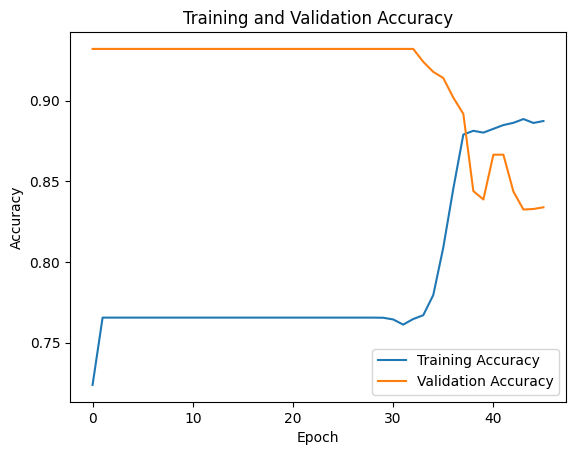

In [701]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [702]:
# Evaluate your model
loss, accuracy = model.evaluate(X_test_sequences, y_test_avg_sequences)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


112/112 [==============================] - 3s 29ms/step - loss: 0.2791 - accuracy: 0.8623
Test Loss: 0.2790907919406891, Test Accuracy: 0.8623208999633789


### Evaluation

## 95 data

In [703]:
# Data pre Processing
# Load X and Y from desired file
X_95 = df_95[features]
y_95 = df_95['on_lift']

# Impute missing values
X_95_imputed = imputer.fit_transform(X_95)

# Scale features
X_95_scaled = scaler.fit_transform(X_95_imputed)

num_95_features = X_95_scaled.shape[1]
########## Scaling different features requires some thought. EG Lat, long vs alt #############

In [704]:
# DataFrame shape (num_samples, num_features)
X_95_sequences = create_sequences(pd.DataFrame(X_95_scaled), sequence_length)
y_95_sequences = create_sequences(pd.DataFrame(y_95), sequence_length)

# Print shape to verify
print("Shape of X_95_sequences:", X_95_sequences.shape)
print("Shape of y_95_sequences:", y_95_sequences.shape)

Shape of X_95_sequences: (5658, 60, 23)
Shape of y_95_sequences: (5658, 60, 1)


In [705]:
# Evaluate your model
loss_95, accuracy_95 = model.evaluate(X_95_sequences, y_95_sequences)
print(f'Test Loss_95: {loss_95}, Test Accuracy_95: {accuracy_95}')

177/177 [==============================] - 3s 16ms/step - loss: 0.4642 - accuracy: 0.7941
Test Loss_95: 0.46418511867523193, Test Accuracy_95: 0.794093906879425


## 206 data

In [706]:
# Data pre Processing
# Load X and Y from desired file
X_206 = df_206[features]
y_206 = df_206['on_lift']

# Impute missing values
X_206_imputed = imputer.fit_transform(X_206)

# Scale features
X_206_scaled = scaler.fit_transform(X_206_imputed)

num_206_features = X_206_scaled.shape[1]
########## Scaling different features requires some thought. EG Lat, long vs alt #############

In [707]:
# DataFrame shape (num_samples, num_features)
X_206_sequences = create_sequences(pd.DataFrame(X_206_scaled), sequence_length)
y_206_sequences = create_sequences(pd.DataFrame(y_206), sequence_length)

# Print shape to verify
print("Shape of X_206_sequences:", X_206_sequences.shape)
print("Shape of y_206_sequences:", y_206_sequences.shape)

Shape of X_206_sequences: (12314, 60, 23)
Shape of y_206_sequences: (12314, 60, 1)


In [708]:
# Evaluate your model
loss_206, accuracy_206 = model.evaluate(X_206_sequences, y_206_sequences)
print(f'Test Loss_206: {loss_206}, Test Accuracy_206: {accuracy_206}')

385/385 [==============================] - 7s 18ms/step - loss: 0.3256 - accuracy: 0.8270
Test Loss_206: 0.32559117674827576, Test Accuracy_206: 0.8269855380058289


## 310 data

In [709]:
# Data pre Processing
# Load X and Y from desired file
X_310 = df_310[features]
y_310 = df_310['on_lift']

# Impute missing values
X_310_imputed = imputer.fit_transform(X_310)

# Scale features
X_310_scaled = scaler.fit_transform(X_310_imputed)

num_310_features = X_310_scaled.shape[1]
########## Scaling different features requires some thought. EG Lat, long vs alt #############


In [710]:
# DataFrame shape (num_samples, num_features)
X_310_train_sequences = create_sequences(pd.DataFrame(X_310_scaled), sequence_length)

y_310_train_sequences = create_sequences(pd.DataFrame(y_310), sequence_length)

# Print shape to verify
print("Shape of X_310_train_sequences:", X_310_train_sequences.shape)

print("Shape of y_310_train_sequences:", y_310_train_sequences.shape)



Shape of X_310_train_sequences: (18518, 60, 23)
Shape of y_310_train_sequences: (18518, 60, 1)


In [711]:
y_310_train_sequences = sequence_averaging(y_310_train_sequences)

In [712]:
# Evaluate your model
loss_310, accuracy_310 = model.evaluate(X_310_train_sequences, y_310_train_sequences)
print(f'Test Loss_310: {loss_310}, Test Accuracy_310: {accuracy_310}')

579/579 [==============================] - 5s 9ms/step - loss: 0.4910 - accuracy: 0.8075
Test Loss_310: 0.49102693796157837, Test Accuracy_310: 0.807538628578186
